In [1]:
import cv2
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#convolution
def convolution(image, kernel):
    kRows, kCols = kernel.shape
    rows,cols = image.shape
    kCenterX = kCols /2
    kCenterY = kRows /2
    out_rows = (-kRows + rows + 2*1)/1 +1 
    out_cols = (-kCols + cols + 2*1)/1 +1 
    out = [[0] *out_cols] * out_rows
    
    

    for i in range(1, rows+1) :             
    
        for j in range(1, cols+1) :           
        
            for m in range(1, kRows+1):     
            
                mm = kRows - 1 - m    

                for n in range(1, kCols+1):   
                
                    nn = kCols - 1 - n 

                   
                    ii = i + (m - kCenterY)
                    jj = j + (n - kCenterX);

                    # ignore input samples which are out of bound
                    if( ii >= 0 and ii < rows and jj >= 0 and jj < cols ):
                        out[i][j] += image[ii][jj] * kernel[mm][nn];
    return out
                

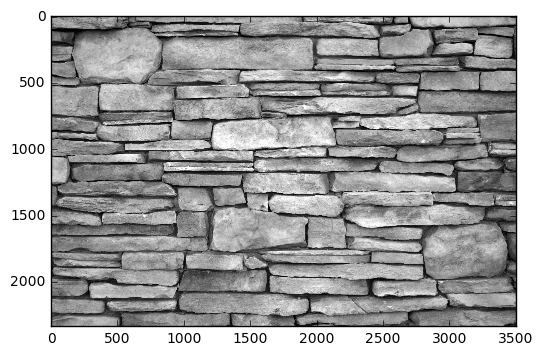

In [3]:
#first convert to greyscale
#data =  cv2.cvtColor(cv2.imread('Lenna_color.png'), cv2.COLOR_RGB2GRAY)

data =  cv2.cvtColor(cv2.imread('wall.jpeg'), cv2.COLOR_RGB2GRAY)
plt.imshow(data, cmap='gray')


In [4]:
GX_FILTER = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]

GY_FILTER = [
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
]

GX_FILTER = np.asarray(GX_FILTER)
GY_FILTER = np.asarray(GY_FILTER)

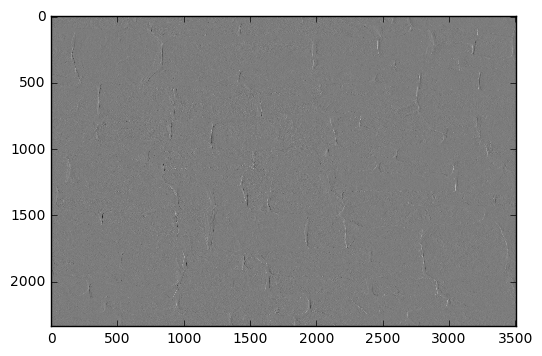

In [5]:
gx = signal.convolve2d(data, GX_FILTER)
plt.imshow(gx, cmap='gray')

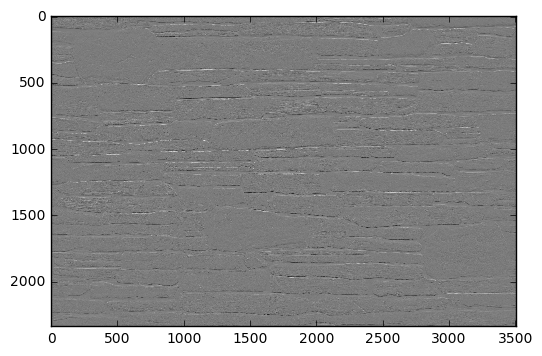

In [6]:
gy = signal.convolve2d(data, GY_FILTER)
plt.imshow(gy, cmap='gray')

In [7]:
#Comparison

sobelx = cv2.Sobel(data,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(data,cv2.CV_64F,0,1,ksize=5)



In [ ]:
x = convolution(data, GY_FILTER)

